In [1]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 24.1 MB/s eta 0:00:00


In [2]:
import pandas as pd
import xgboost 

In [3]:
dataset = pd.read_csv("insurance_pre.csv")

In [4]:
dataset = pd.get_dummies(dataset, drop_first = True)
dataset

,age,bmi,children,charges,sex_male,smoker_yes
0,19,27.900,0,16884.92400,False,True
1,18,33.770,1,1725.55230,True,False
2,28,33.000,3,4449.46200,True,False
3,33,22.705,0,21984.47061,True,False
4,32,28.880,0,3866.85520,True,False
...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,True,False
1334,18,31.920,0,2205.98080,False,False
1335,18,36.850,0,1629.83350,False,False
1336,21,25.800,0,2007.94500,False,False


In [5]:
dataset.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes'], dtype='object')

In [6]:
independent = dataset[['age', 'bmi', 'children','sex_male', 'smoker_yes']]

In [7]:
dependent = dataset[['charges']]

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(independent, dependent, test_size = 0.30, random_state =0)

In [11]:
from xgboost import XGBRegressor
regressor = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=0)
regressor.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

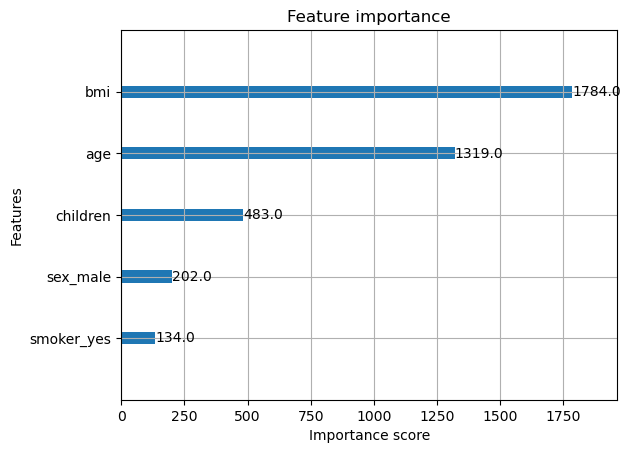

In [13]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

plot_importance(regressor)
plt.show()

In [14]:
Y_pred = regressor.predict(X_test)

In [15]:
from sklearn.metrics import r2_score
r2score = r2_score(Y_test,Y_pred )

In [16]:
r2score

0.8496246337890625

In [17]:
import pickle
filename = "final_xgboosting.sav"

In [18]:
pickle.dump(regressor,open(filename,'wb'))

In [20]:
loaded_model = pickle.load(open("final_xgboosting.sav",'rb'))

In [21]:
result = loaded_model.predict([[35,0,22.6,2,0]])

In [22]:
result

array([8345.849], dtype=float32)